In [3]:
%pip install torch torchvision
%pip install ipykernel
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.3 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.3 MB 1.5 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.3 MB 2.0 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.3 MB 2.4 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.3 MB 2.5 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.3 MB 2.5 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.3 MB 2.2 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/8.3 MB 2.3 MB/s eta 0:00:02
   ---------------------- ----------------- 4.7/8.3 MB 2.5 MB/s eta 0:00:02
   --------------------------- ------------ 5.8/8.3 M

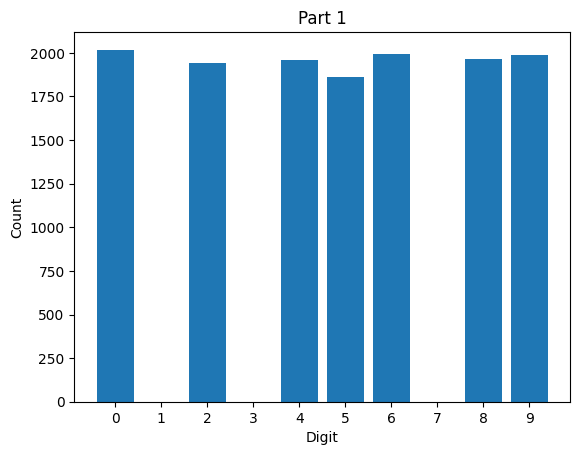

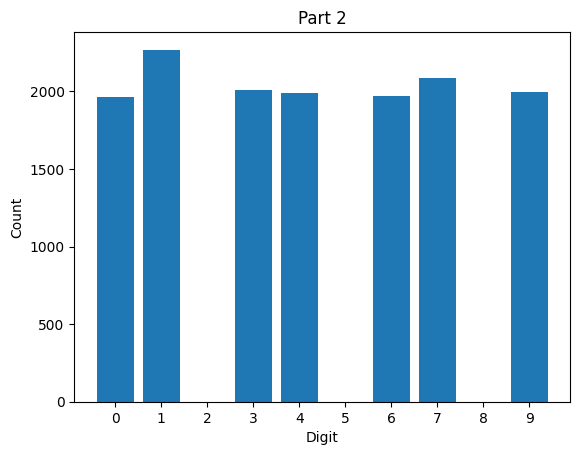

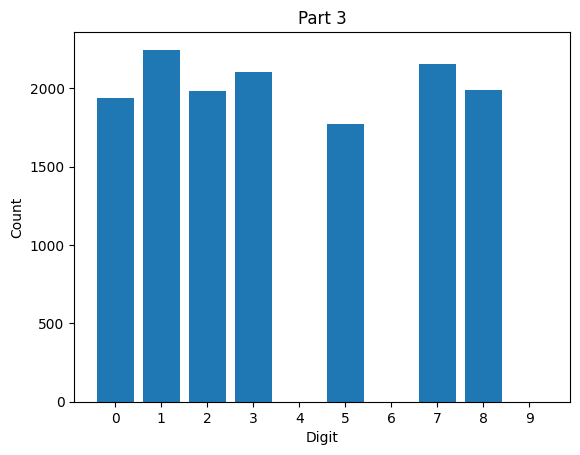

In [9]:
import torch
from torch.utils.data import random_split, Subset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from collections import Counter

# Load MNIST
transform = transforms.ToTensor()

trainset = datasets.MNIST(
    "../MNIST_data/",
    download=True,
    train=True,
    transform=transform
)

# Split into 3 parts
total_length = len(trainset)
split_size = total_length // 3

torch.manual_seed(42)
part1, part2, part3 = random_split(trainset, [split_size] * 3)

# Function to exclude specific digits
def exclude_digits(dataset, excluded_digits):
    indices = [
        i for i in range(len(dataset))
        if dataset[i][1] not in excluded_digits
    ]
    return Subset(dataset, indices)

# Function to plot label distribution
def plot_distribution(dataset, title):
    from collections import Counter
    import matplotlib.pyplot as plt

    labels = [dataset[i][1] for i in range(len(dataset))]
    counter = Counter(labels)

    # Force digits 0–9 to appear
    digits = list(range(10))
    counts = [counter.get(d, 0) for d in digits]

    plt.figure()
    plt.bar(digits, counts)
    plt.xticks(digits)
    plt.title(title)
    plt.xlabel("Digit")
    plt.ylabel("Count")
    plt.show()

# Apply exclusions
part1 = exclude_digits(part1, [1, 3, 7])
part2 = exclude_digits(part2, [2, 5, 8])
part3 = exclude_digits(part3, [4, 6, 9])

# Plot
plot_distribution(part1, "Part 1")
plot_distribution(part2, "Part 2")
plot_distribution(part3, "Part 3")

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 128)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [18]:
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

def train_model(model, dataset, epochs=5, batch_size=64, lr=0.001):
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0
        
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)
        
            optimizer.zero_grad()
        
            outputs = model(images)
            loss = criterion(outputs, labels)
        
            loss.backward()
            optimizer.step()
        
            # accumulate properly
            total_loss += loss.item() * labels.size(0)
        
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        # compute true averages
        avg_loss = total_loss / total
        accuracy = 100 * correct / total
        
        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Loss: {avg_loss:.4f} "
              f"Accuracy: {accuracy:.2f}%")

    return model

In [19]:
model1 = SimpleModel()
train_model(model1, part1)

model2 = SimpleModel()
train_model(model2, part2)

model3 = SimpleModel()
train_model(model3, part3)

Epoch [1/5] Loss: 0.5709 Accuracy: 83.99%
Epoch [2/5] Loss: 0.2436 Accuracy: 93.01%
Epoch [3/5] Loss: 0.1909 Accuracy: 94.54%
Epoch [4/5] Loss: 0.1587 Accuracy: 95.54%
Epoch [5/5] Loss: 0.1397 Accuracy: 95.99%
Epoch [1/5] Loss: 0.4455 Accuracy: 88.74%
Epoch [2/5] Loss: 0.1748 Accuracy: 95.04%
Epoch [3/5] Loss: 0.1437 Accuracy: 95.89%
Epoch [4/5] Loss: 0.1188 Accuracy: 96.49%
Epoch [5/5] Loss: 0.0994 Accuracy: 97.07%
Epoch [1/5] Loss: 0.5645 Accuracy: 84.43%
Epoch [2/5] Loss: 0.2502 Accuracy: 92.32%
Epoch [3/5] Loss: 0.1957 Accuracy: 94.02%
Epoch [4/5] Loss: 0.1642 Accuracy: 94.90%
Epoch [5/5] Loss: 0.1386 Accuracy: 95.73%


SimpleModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)